<h1 align="center"> Support Vector Machine </h1>
<h6 align="center"> An introduction to Machine Learning</h6>

`Support Vector Machine` is a supervised learning algorithm which can be used for both classification and regression challenges. However, it is mostly used in classification problems. In this article, I will be discussing about the `Support Vector Machine` algorithm and how it works.

you can follow me on `linkedin`(https://www.linkedin.com/in/md-rishat-talukder-a22157239/)

I also have a `youtube` channel where I post videos on programming and machine learning. So, if you are interested in watching those, you can subscribe to my channel(https://www.youtube.com/channel/UCEEkKXpAkSwcMaIHnGi3Niw)

And you can also check out my `github` repo here(https://github.com/RishatTalukder/learning_machine_learning/tree/main)

## Table of contents<a id='toc0_'></a>    
- [Introduction](#toc1_)    
- [How does SVM work?](#toc2_)    
- [Implementing SVM in Python](#toc3_)    
- [Grid Search](#toc4_)    
- [Conclusion](#toc5_)    
        - [Happy SVMing!](#toc5_1_1_1_1_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

# <a id='toc1_'></a>[Introduction](#toc0_)

`Support vector machine` is a simple and elegant algorithm that is used for both classification and regression problems.

Given a set of training examples, each marked for beloging to one of `two categories`, an `SVM` training algorithm builds a model that assigns new examples into one category or the other, making it a `non-probabilistic binary linear classifier`.

An `SVM` model is a representation of the examples as points in space, mapped so that the examples of the separate categories are divided by a clear gap that is as wide as possible. New examples are then mapped into that same space and predicted to belong to a category based on which side of the gap they fall.

More formally, let's say you have a set of data that looks like this:

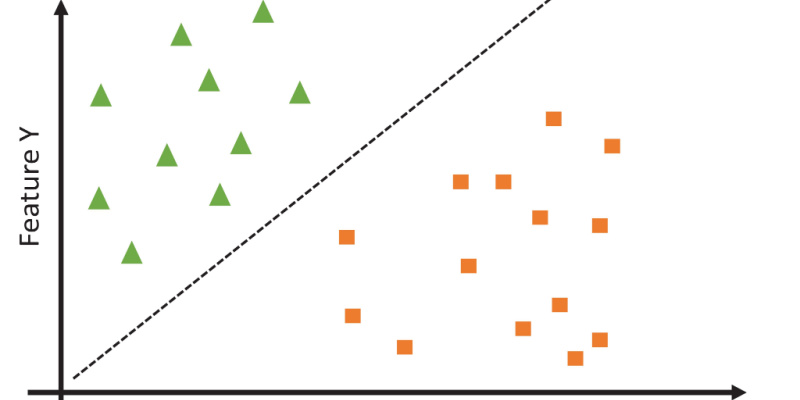

The data has `orenge` and `blue` points. You can separet them by drawing a line between them. But there are many lines that can be drawn between them. So, which line should you choose?

The line that maximizes the distance between the two classes is the line that should be chosen. This line is called the `maximum margin hyperplane`. The distance between the line and the closest data points is called the `margin`. The goal of `SVM` is to choose a line that has the maximum margin.

Now you can have a question in your mind that, what if the data is not linearly separable? In that case, `SVM` uses a `kernel trick` to transform the data into a higher dimensional space. This is called `kerneling`.

In this article I'll discuss how `SVM` works and how to implement it in `python` using `scikit-learn` and also talk about the `kernel trick` and other important concepts.

# <a id='toc2_'></a>[How does SVM work?](#toc0_)

The `SVM` algorithm finds the `hyperplane` that best divides the dataset into two classes. The `hyperplane` is the line that maximizes the margin between the two classes. The margin is the distance between the nearest point of each class to the `hyperplane`. The nearest points are called `support vectors`.

The `hyperplane` can be described by the equation:

$$w^T x - b = 0$$

where `w` is the normal to the `hyperplane` and `b` is the bias. The `hyperplane` divides the feature space into two parts. The points on each side of the `hyperplane` are assigned to different classes.

I think this graph will help you to understand the concept of `hyperplane`:

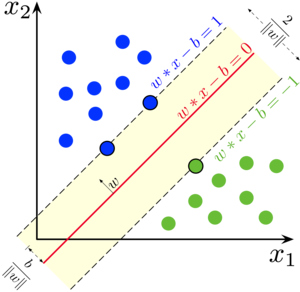



Now, there are so much math involved in `SVM` algorithm. But I'll try to keep it simple and easy to understand.

The `SVM` algorithm tries to find the `hyperplane` with the maximum margin. The margin is the distance between the `hyperplane` and the nearest point of each class. The `SVM` algorithm finds the optimal `hyperplane` in an iterative manner. It tries to maximize the margin between the `hyperplane` and the training data.

Now, let's see how the `SVM` algorithm works in python.

# <a id='toc3_'></a>[Implementing SVM in Python](#toc0_)

SO, we will start by importing the necessary libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

#ignoring the warnings
warnings.filterwarnings('ignore')

%matplotlib inline

Now we will use the built-in `breast cancer` dataset from `scikit-learn` to train the `SVM` model. 

let's load that.

In [2]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

The `dataset` is leaded and stored in the `cancer` variable. Now, let's explore the dataset.

> it's a dictionary-like object that holds all the data and some metadata about the data. This data is stored in the `.data` member, which is a `n_samples`, `n_features` array. In the case of supervised problem, one or more response variables are stored in the `.target` member.


We can check out it's keys as it is a dictionary-like object.

In [3]:
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

The dataset has `data`, `target`, `frame`, `target_names`, `DESCR`, `feature_names`, `filename` etc. Not all of them are important for us. We will only use `data` and `target` to train the model and `feature_names` and `target_names` to make the data more readable.

SO, I'll start by seeing and `description` of the dataset.

In [4]:
print(cancer['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

The description shows that the dataset has `569` samples and `30` features. The features are the characteristics of the cell nuclei present in the breast cancer. The target is `binary` and represents the diagnosis of the cancer. `0` represents `malignant` and `1` represents `benign`.

Now let's turn this data into a `pandas` dataframe.

In [5]:
feat_data = pd.DataFrame(cancer['data'], columns=cancer['feature_names'])
feat_data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


The dataframe is made. Now let's see so details.

In [6]:
feat_data.info( )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

There is no data missing. Now we can train the model. But where is the target class. We can find it in the `target` variable.

In [7]:
target = cancer['target']
print(cancer['target_names'])
print(len(target))

['malignant' 'benign']
569


AS you can see this is just a `1D` array. We can add this to the dataframe. 
> 0 represents `malignant` and `1` represents `benign`.


now we can make the `X` and `y` variables. And start the process of training the model.

In [8]:
X = feat_data
Y = target

We will import the `train_test_split` function from `scikit-learn` to split the data into training and testing sets And also import the `SVC` class to train the `SVM` model.

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

Now let's make the model.
- we will start with splitting the data into training and testing sets.
- Then we will make the model and train it by fitting the training data.
- Then we will make predictions on the testing data and see how well the model performs.

In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=101) # we have to pass the features and the target then the test size as a percentage and the random state is optional
model = SVC() # we are using the default parameters
model.fit(X_train, Y_train) # we are training the model

SVC()

The model is trained now we can make predictions.

In [11]:
predictions = model.predict(X_test) # we are predicting the model

the predictions are made. Now we can see how well the model performs.

In [12]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(Y_test, predictions))
print('\n')
print(classification_report(Y_test, predictions))

[[ 56  10]
 [  3 102]]


              precision    recall  f1-score   support

           0       0.95      0.85      0.90        66
           1       0.91      0.97      0.94       105

    accuracy                           0.92       171
   macro avg       0.93      0.91      0.92       171
weighted avg       0.93      0.92      0.92       171



Well, the model has an accuracy of `92%`. This is a good accuracy and most of the time you will get a good accuracy with `SVM` model.

But some times The model might catastrophically fail and categorize everything into one class. This is because `SVM` is sensitive to the `feature scales`. We can fine tune the model by fixing the parameters and scaling the features. In this models case it is not necessary. But I'll show anyway how to do it.

# <a id='toc4_'></a>[Grid Search](#toc0_)

`Grid search` is a technique used to tune the hyperparameters of a model. The hyperparameters are the parameters that are not learned by the model. They are set before training the model. In `SVM` the hyperparameters are `C` and `gamma`.

SO, AS we are fine tuning the model, we need to know what are the hyperparameters of the model. We can see that by using the `get_params` method.



In [13]:
SVC().get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

The parameters are `C`, `break_ties`, `cache_size`, `class_weight`, `coef0`, `decision_function_shape`, `degree`, `gamma`, `kernel`, `max_iter`, `probability`, `random_state`, `shrinking`, `tol`, `verbose`.

Now we can use `grid search` to find the best hyperparameters for the model. But first let me explain what these hyperparameters are.

- `C` is the `penalty` parameter of the `error term`. It controls the trade off between smooth decision boundary and classifying the training points correctly. A large `C` value gives you low bias and high variance and a small `C` value gives you high bias and low variance.
- `gamma` is the `kernel` coefficient for `rbf`, `poly` and `sigmoid`. It controls the influence of a single training example. A large `gamma` value gives you high bias and low variance and a small `gamma` value gives you low bias and high variance.(You have to learn the math behind these to understand these fancy terms)
- `kernel` is the `kernel` type to be used in the algorithm. It can be `linear`, `poly`, `rbf` and `sigmoid`.
- `degree` is the blah blah blah.
- blah blah blah.
- blah

There you go. You have the knowledge of the hyperparameters. 

> I don't know the math behind these also and I don't think you need to know that to use `SVM` and grid search. But if you are interested, you can learn that.


Now let's use `grid search` to find the best hyperparameters for the model. I'll try to fine to fine tune the model by using the `C` and `gamma` hyperparameters.

We will import the `GridSearchCV` class from `scikit-learn` to use `grid search`.


In [14]:
#importing the grid search cv
from sklearn.model_selection import GridSearchCV

Now how do we use `GridSearchCV` to find the best hyperparameters for the model?

- We will first make a dictionary of the hyperparameters and their values that we want to try as a list.
- Then we will make a `grid` variable using the `GridSearchCV` class and pass the model, the hyperparameters and the number of `cross validation` to it.

Now let's see the best hyperparameters for the model.

In [15]:
param_grid = {'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001]} # we are creating a dictionary with the parameters that we want to test

grid = GridSearchCV(SVC(), param_grid, verbose=3) # we are creating a grid search object and we are passing the model, the parameters and the verbose to see the output

First we made a dictionary of the hyperparameters: 
```python
param_grid = {'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001]}
```

Here we are trying `5` different values for `C` and `5` different values for `gamma`. So, we are trying `25` different combinations of hyperparameters.

Which will be tested by the grid search algorithm using `5` fold cross validation. So, the model will be trained `25 * 5 = 125` times.


*** what is 5 fold cross validation? ***

`Cross validation` is a technique used to evaluate the performance of a model. It is used to estimate how accurately a predictive model will perform in practice. The `cross validation` process is repeated `k` times and the `k` results are averaged to produce a single estimation.

The training set is split into 5 subsets or "folds". The model is trained 5 times, each time using 4 of the folds for training and the remaining fold for validation.

So, if you have 25 different combinations of hyperparameters and you're using 5-fold cross-validation, the model will indeed be trained 25 * 5 = 125 times. Each training instance corresponds to a different combination of hyperparameters and a different split of the data into training and validation sets.


Then we made a `grid` variable using the `GridSearchCV` class and passed the model, the hyperparameters and the number of `cross validation` to it.

```python
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=3)
```

First parameter is the model, second parameter is the hyperparameters, third parameter is the `refit` parameter which is set to `True` and the fourth parameter is the `verbose` parameter which is set to `3`.

The `refit` parameter is set to `True` because we want to refit the model with the best hyperparameters on the whole dataset.

The `verbose` parameter is set to `3` to see the progress of the `grid search` algorithm.

Now we can fit the `grid` variable to the training data.

In [16]:
grid.fit(X_train, Y_train) # we are fitting the grid

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ....................C=0.1, gamma=1;, score=0.637 total time=   0.0s
[CV 2/5] END ....................C=0.1, gamma=1;, score=0.637 total time=   0.0s
[CV 3/5] END ....................C=0.1, gamma=1;, score=0.625 total time=   0.0s
[CV 4/5] END ....................C=0.1, gamma=1;, score=0.633 total time=   0.0s
[CV 5/5] END ....................C=0.1, gamma=1;, score=0.633 total time=   0.0s
[CV 1/5] END ..................C=0.1, gamma=0.1;, score=0.637 total time=   0.0s
[CV 2/5] END ..................C=0.1, gamma=0.1;, score=0.637 total time=   0.0s
[CV 3/5] END ..................C=0.1, gamma=0.1;, score=0.625 total time=   0.0s
[CV 4/5] END ..................C=0.1, gamma=0.1;, score=0.633 total time=   0.0s
[CV 5/5] END ..................C=0.1, gamma=0.1;, score=0.633 total time=   0.0s
[CV 1/5] END .................C=0.1, gamma=0.01;, score=0.637 total time=   0.0s
[CV 2/5] END .................C=0.1, gamma=0.01

[CV 2/5] END ................C=0.1, gamma=0.001;, score=0.637 total time=   0.0s
[CV 3/5] END ................C=0.1, gamma=0.001;, score=0.625 total time=   0.0s
[CV 4/5] END ................C=0.1, gamma=0.001;, score=0.633 total time=   0.0s
[CV 5/5] END ................C=0.1, gamma=0.001;, score=0.633 total time=   0.0s
[CV 1/5] END ...............C=0.1, gamma=0.0001;, score=0.887 total time=   0.0s
[CV 2/5] END ...............C=0.1, gamma=0.0001;, score=0.938 total time=   0.0s
[CV 3/5] END ...............C=0.1, gamma=0.0001;, score=0.963 total time=   0.0s
[CV 4/5] END ...............C=0.1, gamma=0.0001;, score=0.962 total time=   0.0s
[CV 5/5] END ...............C=0.1, gamma=0.0001;, score=0.886 total time=   0.0s
[CV 1/5] END ......................C=1, gamma=1;, score=0.637 total time=   0.0s
[CV 2/5] END ......................C=1, gamma=1;, score=0.637 total time=   0.0s
[CV 3/5] END ......................C=1, gamma=1;, score=0.625 total time=   0.0s
[CV 4/5] END ...............

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
             verbose=3)

AAAANNND here you go. The `grid search` algorithm has found the best hyperparameters for the model. 

We can see the best hyperparameters by using the `best_params_` attribute of the `grid` variable.

In [17]:
grid.best_params_ # we are getting the best parameters

{'C': 1, 'gamma': 0.0001}

The best hyperparameters are `{'C': 1, 'gamma': 0.0001}`.

meaning that the best `C` or `penalty` parameter of the `error term` is `1` and the best `gamma` or `kernel` coefficient for `rbf`, `poly` and `sigmoid` is `0.0001`.

We can also see the best estimator by using the `best_estimator_` attribute of the `grid` variable. 

In [18]:
model = grid.best_estimator_ # we are getting the best estimator model

model.get_params() # we can see the parameters of the model

{'C': 1,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 0.0001,
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

This is the best performing model with the best hyperparameters.

Now we can make `predictions` using this model directly or make a new model using the best hyperparameters and then make predictions. But why would we do that? We can just use the best performing model to make predictions. 

In [19]:
grid_predictions = grid.predict(X_test) # we are predicting the model

Let's see if the model performs better with the best hyperparameters.

In [20]:
# we are printing the classification report and the confusion matrix
print(confusion_matrix(Y_test, grid_predictions))
print('\n')
print(classification_report(Y_test, grid_predictions))


[[ 59   7]
 [  4 101]]


              precision    recall  f1-score   support

           0       0.94      0.89      0.91        66
           1       0.94      0.96      0.95       105

    accuracy                           0.94       171
   macro avg       0.94      0.93      0.93       171
weighted avg       0.94      0.94      0.94       171



AS you can see we have a better accuracy of `94%` with the best hyperparameters. This is better than the previous accuracy of `92%` with the default hyperparameters.

So, the `grid search` algorithm has indeed found the best hyperparameters for the model.

> Grid search can be used more effectively to find the best hyperparameters for the model. AS this is a demo, I have used only `C` and `gamma` hyperparameters and I hope you have a rough idea of how to use `grid search` to find the best hyperparameters for the model.

> Grid search is not only used in `SVM` but also in all the other models to find the best hyperparameters for the model.

# <a id='toc5_'></a>[Conclusion](#toc0_)

`Support Vector Machine` is a simple and elegant algorithm that is used for both classification and regression problems. It is mostly used in classification problems. The `SVM` algorithm finds the `hyperplane` that best divides the dataset into two classes. The `hyperplane` is the line that maximizes the margin between the two classes. The margin is the distance between the nearest point of each class to the `hyperplane`. The nearest points are called `support vectors`.

I have enjoyed writing this article very much and learned one of the most important algorithms in machine learning. I hope you have enjoyed reading this article and learned something new. If you have any questions or suggestions, feel free to ask me. I would love to hear from you.

##### <a id='toc5_1_1_1_1_'></a>[Happy SVMing!](#toc0_)